In [66]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import sys
from pathlib import Path
from classes.microgrid import MicroGrid

# Load data

In [67]:
# Load file paths
load_path = "data/data_QL25_Challenge_3_load.csv"
pv_path = "data/data_QL25_Challenge_3_price_pvgen.csv"

# Read the CSVs
load_df = pd.read_csv(load_path)
pv_and_price_df = pd.read_csv(pv_path)

# Normalize column names
load_df.columns = load_df.columns.str.strip().str.lower()
pv_and_price_df.columns = pv_and_price_df.columns.str.strip().str.lower()

# Rename _time or similar to 'time'
for df in [load_df, pv_and_price_df]:
    for col in df.columns:
        if "time" in col:
            df.rename(columns={col: "time"}, inplace=True)

# Parse datetime
load_df["time"] = pd.to_datetime(load_df["time"]) + pd.Timedelta(days=7)
pv_and_price_df["time"] = pd.to_datetime(pv_and_price_df["time"])
merged_df = pd.merge(load_df, pv_and_price_df, on="time", how="inner")

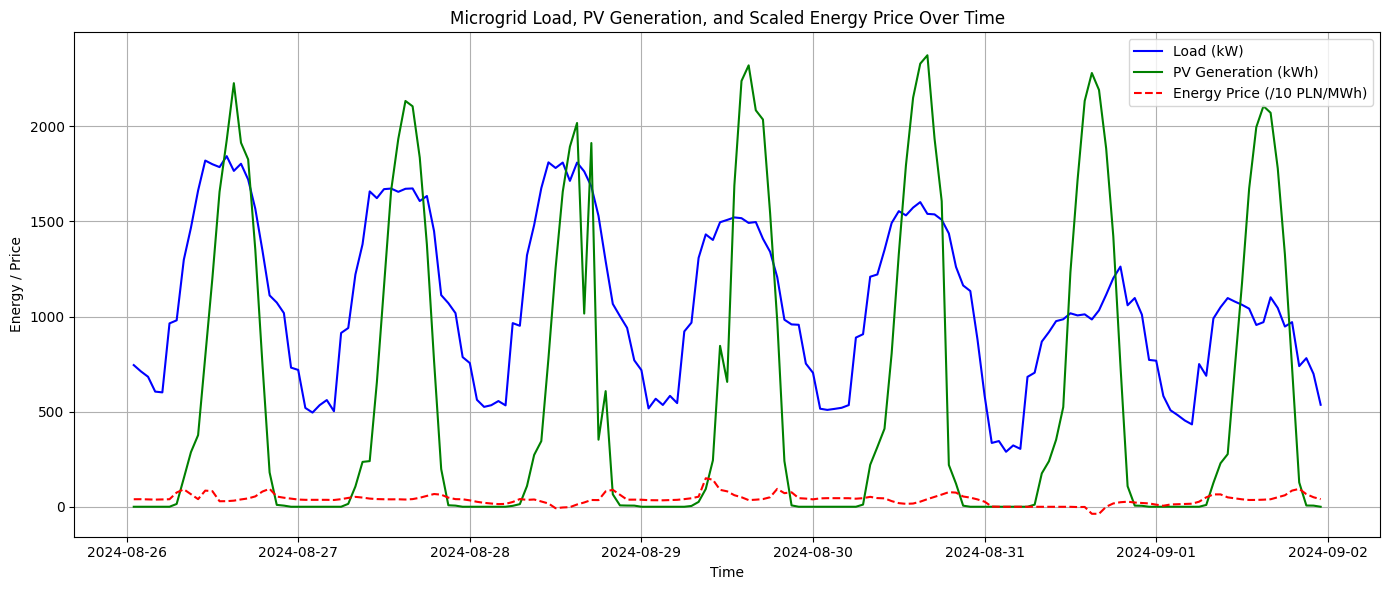

In [68]:
import matplotlib.pyplot as plt

# Plot setup
plt.figure(figsize=(14, 6))

# Plot load
plt.plot(merged_df["time"], merged_df["load (kw)"], label="Load (kW)", color='blue')

# Plot PV generation
plt.plot(merged_df["time"], merged_df["pv_3mw_generation (kwh)"], label="PV Generation (kWh)", color='green')

# Plot energy price (scaled to fit visually)
price_scaled = merged_df["energy price (pln/mwh)"] / 10  # adjust for visibility
plt.plot(merged_df["time"], price_scaled, label="Energy Price (/10 PLN/MWh)", color='red', linestyle='--')

# Labels and legend
plt.title("Microgrid Load, PV Generation, and Scaled Energy Price Over Time")
plt.xlabel("Time")
plt.ylabel("Energy / Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


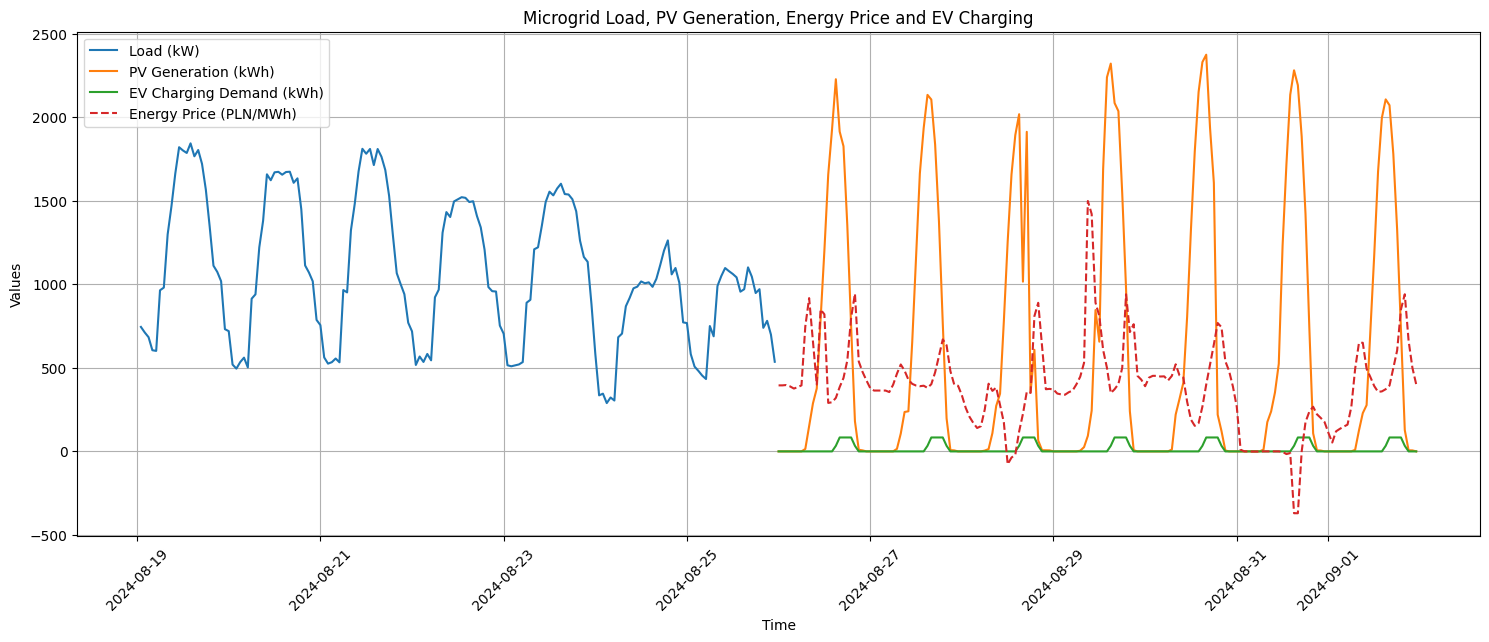

In [69]:
import pandas as pd
import matplotlib.pyplot as plt

# Load file paths
load_path = "data/data_QL25_Challenge_3_load.csv"
pv_path = "data/data_QL25_Challenge_3_price_pvgen.csv"
ev_path = "data/ev_charging_schedule.csv"  # Dodany plik EV

# Read the CSVs
load_df = pd.read_csv(load_path)
pv_and_price_df = pd.read_csv(pv_path)
ev_df = pd.read_csv(ev_path)

# Normalize column names
load_df.columns = load_df.columns.str.strip().str.lower()
pv_and_price_df.columns = pv_and_price_df.columns.str.strip().str.lower()
ev_df.columns = ev_df.columns.str.strip().str.lower()

# Rename any 'time'-like column to 'time'
for df in [load_df, pv_and_price_df, ev_df]:
    for col in df.columns:
        if "time" in col:
            df.rename(columns={col: "time"}, inplace=True)

# Parse datetime
load_df["time"] = pd.to_datetime(load_df["time"])
pv_and_price_df["time"] = pd.to_datetime(pv_and_price_df["time"])
ev_df["time"] = pd.to_datetime(ev_df["time"])

# Merge datasets
merged_df = pd.merge(load_df, pv_and_price_df, on="time", how="outer")
merged_df = pd.merge(merged_df, ev_df, on="time", how="outer").sort_values("time")

# Plot
plt.figure(figsize=(15, 6))
plt.plot(merged_df["time"], merged_df["load (kw)"], label="Load (kW)")
plt.plot(merged_df["time"], merged_df["pv_3mw_generation (kwh)"], label="PV Generation (kWh)")
plt.plot(merged_df["time"], merged_df["ev_demand_kwh"], label="EV Charging Demand (kWh)")
plt.plot(merged_df["time"], merged_df["energy price (pln/mwh)"], label="Energy Price (PLN/MWh)", linestyle='--')

plt.title("Microgrid Load, PV Generation, Energy Price and EV Charging")
plt.xlabel("Time")
plt.ylabel("Values")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()


# Optimalization

In [70]:
display(load_df)

,time,load (kw)
0,2024-08-19 01:00:00+02:00,744.659033
1,2024-08-19 02:00:00+02:00,711.664783
2,2024-08-19 03:00:00+02:00,683.285406
3,2024-08-19 04:00:00+02:00,605.304298
4,2024-08-19 05:00:00+02:00,601.196288
...,...,...
162,2024-08-25 19:00:00+02:00,970.434549
163,2024-08-25 20:00:00+02:00,739.320280
164,2024-08-25 21:00:00+02:00,780.998870
165,2024-08-25 22:00:00+02:00,698.696249


In [71]:
display(pv_and_price_df)

,time,energy price (pln/mwh),pv_3mw_generation (kwh)
0,2024-08-26 00:00:00+02:00,395,0.000000
1,2024-08-26 01:00:00+02:00,395,0.000000
2,2024-08-26 02:00:00+02:00,397,0.000000
3,2024-08-26 03:00:00+02:00,389,0.000000
4,2024-08-26 04:00:00+02:00,376,0.000000
...,...,...,...
163,2024-09-01 19:00:00+02:00,850,732.599991
164,2024-09-01 20:00:00+02:00,940,127.800007
165,2024-09-01 21:00:00+02:00,662,6.600000
166,2024-09-01 22:00:00+02:00,500,6.000000


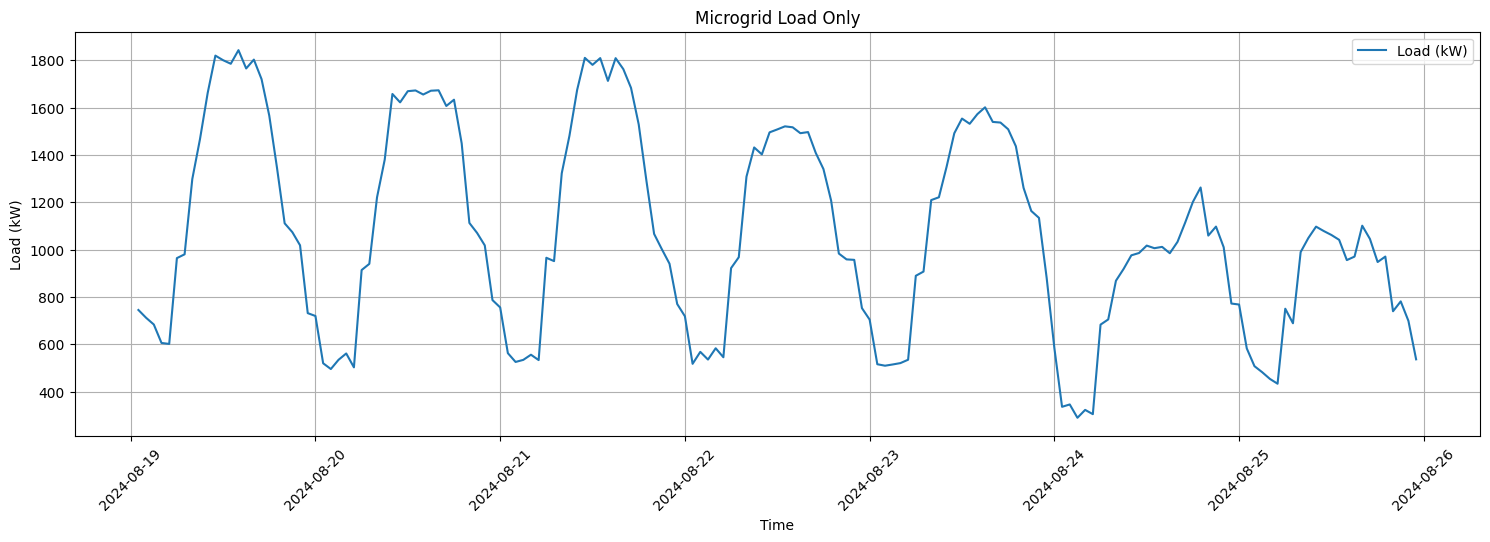

In [72]:
# Plot only the load
plt.figure(figsize=(15, 5))
plt.plot(merged_df["time"], merged_df["load (kw)"], label="Load (kW)", color='tab:blue')

plt.title("Microgrid Load Only")
plt.xlabel("Time")
plt.ylabel("Load (kW)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()


# Costs without PV

In [73]:
import pandas as pd

# === Load datasets ===
load_df = pd.read_csv("data/data_QL25_Challenge_3_load.csv")
price_df = pd.read_csv("data/data_QL25_Challenge_3_price_pvgen.csv")
ev_df = pd.read_csv("data/ev_charging_schedule.csv")

# === Normalize and clean column names ===
for df in [load_df, price_df, ev_df]:
    df.columns = df.columns.str.strip().str.lower()
    for col in df.columns:
        if "time" in col:
            df.rename(columns={col: "time"}, inplace=True)

# Convert time columns to datetime
load_df["time"] = pd.to_datetime(load_df["time"])
price_df["time"] = pd.to_datetime(price_df["time"])
ev_df["time"] = pd.to_datetime(ev_df["time"])

# === Shift load data by +7 days to align with forecast week ===
load_df["time"] = load_df["time"] + pd.Timedelta(days=7)

# === Merge datasets on time ===
df = pd.merge(load_df, price_df, on="time", how="inner")
df = pd.merge(df, ev_df, on="time", how="left")
df["ev_demand_kwh"] = df["ev_demand_kwh"].fillna(0)

# === Add EV demand to base load ===
df["total_demand_kwh"] = df["load (kw)"] + df["ev_demand_kwh"]

# === Convert price from PLN/MWh to PLN/kWh ===
df["price_pln_kwh"] = df["energy price (pln/mwh)"] / 1000

# === Calculate cost and CO2 emissions (no PV) ===
df["cost_pln"] = df["total_demand_kwh"] * df["price_pln_kwh"]
df["co2_kg"] = (df["total_demand_kwh"] / 1000) * 597  # 597 kg/MWh

# === Final results ===
total_cost = df["cost_pln"].sum()
total_co2 = df["co2_kg"].sum()

print(f"💰 Total cost (no PV): {total_cost:.2f} PLN")
print(f"🌍 Total CO₂ emissions (no PV): {total_co2:.2f} kg")


💰 Total cost (no PV): 75483.06 PLN
🌍 Total CO₂ emissions (no PV): 108438.97 kg


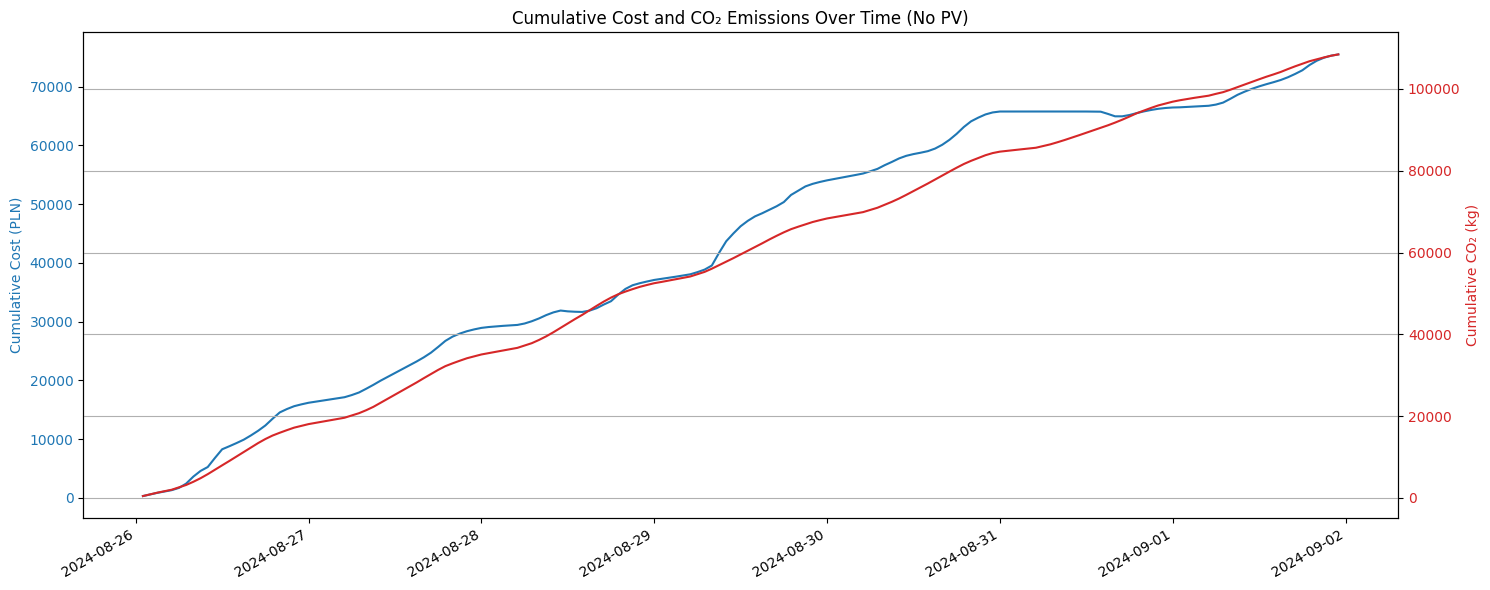

In [74]:
import matplotlib.pyplot as plt

# Calculate cumulative cost and CO₂ over time
df["cumulative_cost_pln"] = df["cost_pln"].cumsum()
df["cumulative_co2_kg"] = df["co2_kg"].cumsum()

# Create plot
fig, ax1 = plt.subplots(figsize=(15, 6))

# Plot cumulative cost
ax1.plot(df["time"], df["cumulative_cost_pln"], label="Cumulative Cost (PLN)", color='tab:blue')
ax1.set_ylabel("Cumulative Cost (PLN)", color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Create second y-axis for CO2
ax2 = ax1.twinx()
ax2.plot(df["time"], df["cumulative_co2_kg"], label="Cumulative CO₂ (kg)", color='tab:red')
ax2.set_ylabel("Cumulative CO₂ (kg)", color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')

# Title and formatting
plt.title("Cumulative Cost and CO₂ Emissions Over Time (No PV)")
fig.autofmt_xdate()
plt.grid(True)
plt.tight_layout()
plt.show()


# Cost with PV but not optimaized

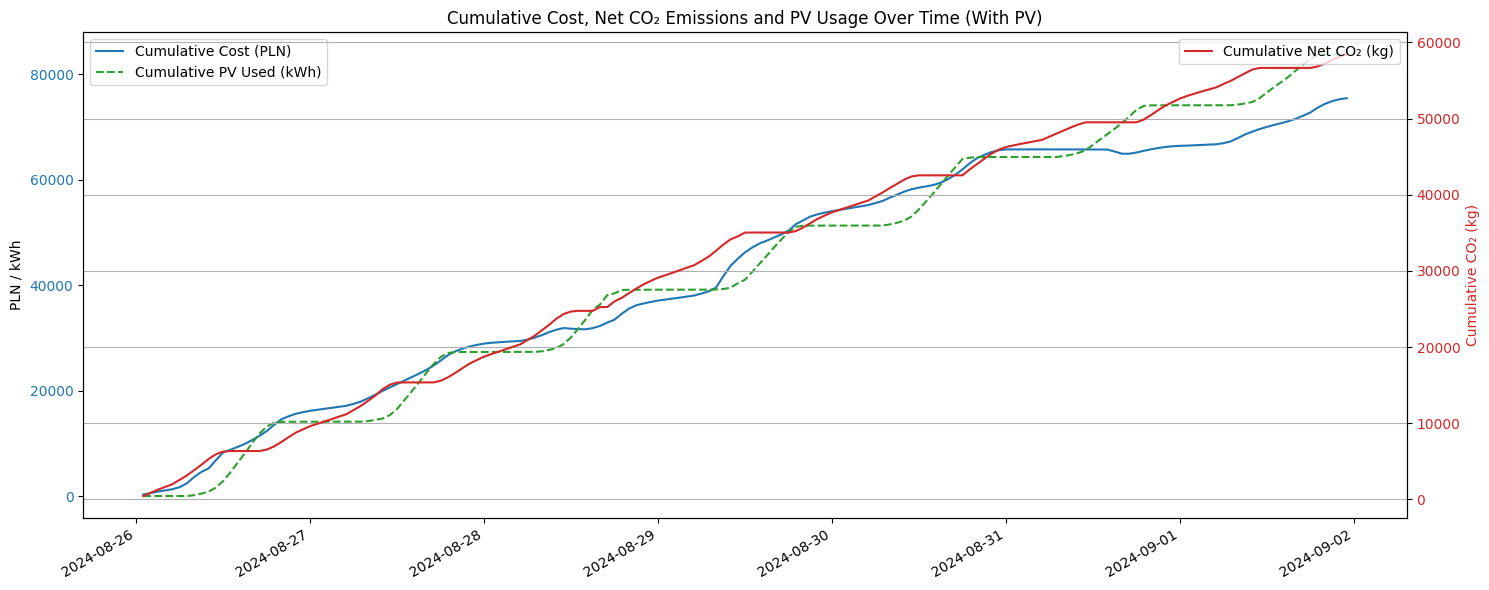

In [75]:
import matplotlib.pyplot as plt

# Recalculate PV used
df["pv_used_kwh"] = df[["pv_3mw_generation (kwh)", "total_demand_kwh"]].min(axis=1)

# Compute net demand after PV
df["net_demand_kwh"] = df["total_demand_kwh"] - df["pv_used_kwh"]

# Calculate CO₂ only for grid-supplied energy
df["net_co2_kg"] = (df["net_demand_kwh"] / 1000) * 597
df["cumulative_net_co2_kg"] = df["net_co2_kg"].cumsum()
df["cumulative_pv_used_kwh"] = df["pv_used_kwh"].cumsum()

# Plot cumulative values
fig, ax1 = plt.subplots(figsize=(15, 6))

# Plot cumulative PV used and cost
ax1.plot(df["time"], df["cumulative_cost_pln"], label="Cumulative Cost (PLN)", color='tab:blue')
ax1.plot(df["time"], df["cumulative_pv_used_kwh"], label="Cumulative PV Used (kWh)", color='tab:green', linestyle='--')
ax1.set_ylabel("PLN / kWh")
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Second y-axis for CO2
ax2 = ax1.twinx()
ax2.plot(df["time"], df["cumulative_net_co2_kg"], label="Cumulative Net CO₂ (kg)", color='tab:red',)
ax2.set_ylabel("Cumulative CO₂ (kg)", color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')

# Formatting
plt.title("Cumulative Cost, Net CO₂ Emissions and PV Usage Over Time (With PV)")
fig.autofmt_xdate()
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.grid(True)
plt.tight_layout()
plt.show()


In [76]:
# Recalculate PV used
df["pv_used_kwh"] = df[["pv_3mw_generation (kwh)", "total_demand_kwh"]].min(axis=1)

# Compute net demand after PV
df["net_demand_kwh"] = df["total_demand_kwh"] - df["pv_used_kwh"]
df.head()

,time,load (kw),energy price (pln/mwh),pv_3mw_generation (kwh),ev_demand_kwh,total_demand_kwh,price_pln_kwh,cost_pln,co2_kg,cumulative_cost_pln,cumulative_co2_kg,pv_used_kwh,net_demand_kwh,net_co2_kg,cumulative_net_co2_kg,cumulative_pv_used_kwh
0,2024-08-26 01:00:00+02:00,744.659033,395,0.0,0.0,744.659033,0.395,294.140318,444.561443,294.140318,444.561443,0.0,744.659033,444.561443,444.561443,0.0
1,2024-08-26 02:00:00+02:00,711.664783,397,0.0,0.0,711.664783,0.397,282.530919,424.863875,576.671237,869.425318,0.0,711.664783,424.863875,869.425318,0.0
2,2024-08-26 03:00:00+02:00,683.285406,389,0.0,0.0,683.285406,0.389,265.798023,407.921387,842.469260,1277.346705,0.0,683.285406,407.921387,1277.346705,0.0
3,2024-08-26 04:00:00+02:00,605.304298,376,0.0,0.0,605.304298,0.376,227.594416,361.366666,1070.063676,1638.713371,0.0,605.304298,361.366666,1638.713371,0.0
4,2024-08-26 05:00:00+02:00,601.196288,384,0.0,0.0,601.196288,0.384,230.859375,358.914184,1300.923050,1997.627555,0.0,601.196288,358.914184,1997.627555,0.0


In [77]:
import numpy as np

# Constants\
const_val_1 = 1
const_val_2 = 2

# Initialize matrix
matrix = []

# Create a 3x3 grid of points
for y in range(3):
    for x in range(3):
        distance = np.sqrt(x**2 + y**2)
        matrix.append([x, y, distance, const_val_1, const_val_2])

# Convert to NumPy array for a cleaner display
matrix = np.array(matrix)

# Display the result
print("Matrix with parameters:")
print(matrix)

Matrix with parameters:
[[0.         0.         0.         1.         2.        ]
 [1.         0.         1.         1.         2.        ]
 [2.         0.         2.         1.         2.        ]
 [0.         1.         1.         1.         2.        ]
 [1.         1.         1.41421356 1.         2.        ]
 [2.         1.         2.23606798 1.         2.        ]
 [0.         2.         2.         1.         2.        ]
 [1.         2.         2.23606798 1.         2.        ]
 [2.         2.         2.82842712 1.         2.        ]]


In [78]:
import pandas as pd

# === Load datasets ===
load_df = pd.read_csv("data/data_QL25_Challenge_3_load.csv")
price_df = pd.read_csv("data/data_QL25_Challenge_3_price_pvgen.csv")
ev_df = pd.read_csv("data/ev_charging_schedule.csv")

# === Normalize and clean column names ===
for df in [load_df, price_df, ev_df]:
    df.columns = df.columns.str.strip().str.lower()
    for col in df.columns:
        if "time" in col:
            df.rename(columns={col: "time"}, inplace=True)

# Convert time columns to datetime
load_df["time"] = pd.to_datetime(load_df["time"])
price_df["time"] = pd.to_datetime(price_df["time"])
ev_df["time"] = pd.to_datetime(ev_df["time"])

# === Shift load data by +7 days to align with forecast week ===
load_df["time"] = load_df["time"] + pd.Timedelta(days=7)

# === Merge datasets on time ===
df = pd.merge(load_df, price_df, on="time", how="inner")
df = pd.merge(df, ev_df, on="time", how="left")
df["ev_demand_kwh"] = df["ev_demand_kwh"].fillna(0)

df["net_load_PV_EV"] = df["load (kw)"] - df["pv_3mw_generation (kwh)"] + df["ev_demand_kwh"]
df['sumaric_load_PV_EV'] = df['net_load_PV_EV'].cumsum()
df['sumaric_load'] = df['load (kw)'].cumsum()

# === Calculate cost and CO2 emissions (with PV) ===
df["cost_pln"] = df["load (kw)"] * df["energy price (pln/mwh)"] / 1000
df["co2_kg"] = (df["load (kw)"] / 1000) * 597  # 597 kg/MWh
df["co2_kg"] = df["co2_kg"].clip(lower=0)


df["sumaric_cost_pln"] = df["cost_pln"].cumsum()
df["sumaric_co2_kg"] = df["co2_kg"].cumsum()

display(df)

,time,load (kw),energy price (pln/mwh),pv_3mw_generation (kwh),ev_demand_kwh,net_load_PV_EV,sumaric_load_PV_EV,sumaric_load,cost_pln,co2_kg,sumaric_cost_pln,sumaric_co2_kg
0,2024-08-26 01:00:00+02:00,744.659033,395,0.000000,0.000000,744.659033,744.659033,744.659033,294.140318,444.561443,294.140318,444.561443
1,2024-08-26 02:00:00+02:00,711.664783,397,0.000000,0.000000,711.664783,1456.323816,1456.323816,282.530919,424.863875,576.671237,869.425318
2,2024-08-26 03:00:00+02:00,683.285406,389,0.000000,0.000000,683.285406,2139.609222,2139.609222,265.798023,407.921387,842.469260,1277.346705
3,2024-08-26 04:00:00+02:00,605.304298,376,0.000000,0.000000,605.304298,2744.913520,2744.913520,227.594416,361.366666,1070.063676,1638.713371
4,2024-08-26 05:00:00+02:00,601.196288,384,0.000000,0.000000,601.196288,3346.109808,3346.109808,230.859375,358.914184,1300.923050,1997.627555
...,...,...,...,...,...,...,...,...,...,...,...,...
162,2024-09-01 19:00:00+02:00,970.434549,850,732.599991,83.333333,321.167892,77555.473801,176084.708917,824.869367,579.349426,72408.542360,105122.571223
163,2024-09-01 20:00:00+02:00,739.320280,940,127.800007,33.333333,644.853606,78200.327407,176824.029197,694.961063,441.374207,73103.503423,105563.945431
164,2024-09-01 21:00:00+02:00,780.998870,662,6.600000,0.000000,774.398870,78974.726277,177605.028067,517.021252,466.256325,73620.524675,106030.201756
165,2024-09-01 22:00:00+02:00,698.696249,500,6.000000,0.000000,692.696249,79667.422526,178303.724316,349.348125,417.121661,73969.872799,106447.323417


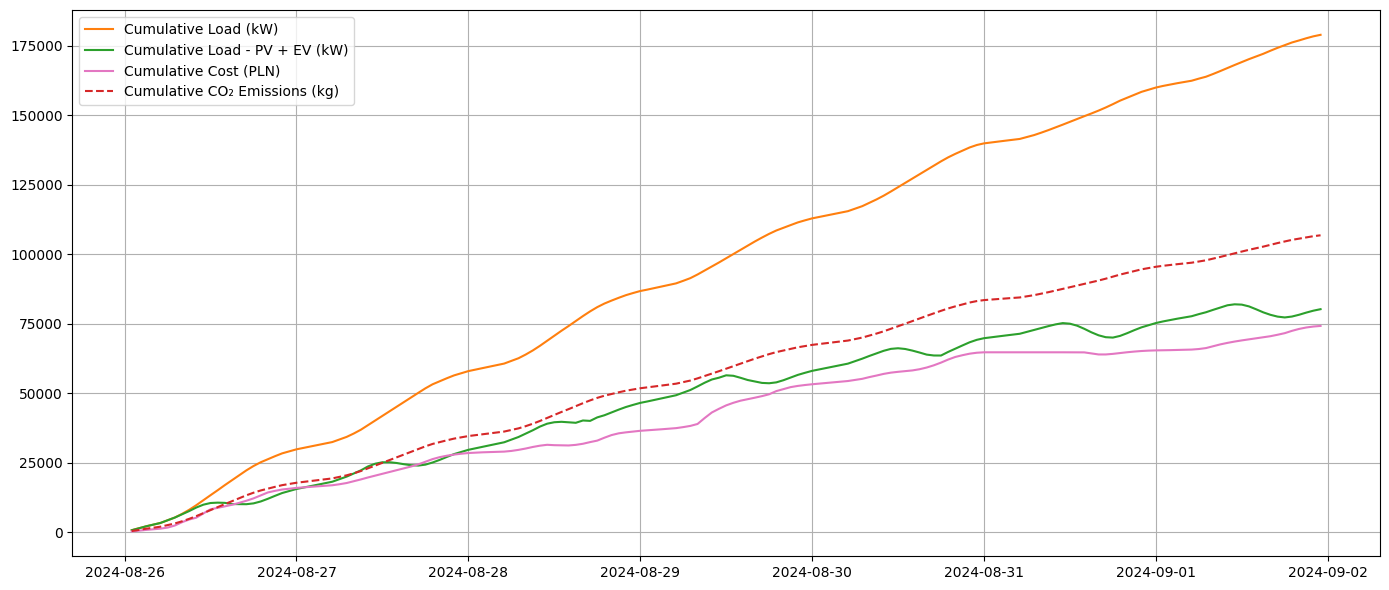

In [79]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))

# Plot cumulative cost
plt.plot(df['time'],df['sumaric_load'], label="Cumulative Load (kW)", color="tab:orange")
plt.plot(df["time"], df["sumaric_load_PV_EV"], label="Cumulative Load - PV + EV (kW)", color="tab:green")


plt.plot(df["time"], df["sumaric_cost_pln"], label="Cumulative Cost (PLN)", color="tab:pink")
plt.plot(df["time"], df["sumaric_co2_kg"], label="Cumulative CO₂ Emissions (kg)", color="tab:red", linestyle='--')

# Titles and labels
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))

# Plot cumulative cost
plt.plot(df['time'],df['sumaric_load'], label="Cumulative Load (kW)", color="tab:orange")
plt.plot(df["time"], df["sumaric_load_PV_EV"], label="Cumulative Load - PV + EV (kW)", color="tab:green")


plt.plot(df["time"], df["sumaric_cost_pln"], label="Cumulative Cost (PLN)", color="tab:pink")
plt.plot(df["time"], df["sumaric_co2_kg"], label="Cumulative CO₂ Emissions (kg)", color="tab:red", linestyle='--')

# Titles and labels
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [98]:
import pandas as pd

# === Load datasets ===
load_df = pd.read_csv("data/data_QL25_Challenge_3_load.csv")
price_df = pd.read_csv("data/data_QL25_Challenge_3_price_pvgen.csv")
ev_df = pd.read_csv("data/ev_charging_schedule.csv")

# === Normalize and clean column names ===
for df in [load_df, price_df, ev_df]:
    df.columns = df.columns.str.strip().str.lower()
    for col in df.columns:
        if "time" in col:
            df.rename(columns={col: "time"}, inplace=True)

# Convert time columns to datetime
load_df["time"] = pd.to_datetime(load_df["time"])
price_df["time"] = pd.to_datetime(price_df["time"])
ev_df["time"] = pd.to_datetime(ev_df["time"])

# === Shift load data by +7 days to align with forecast week ===
load_df["time"] = load_df["time"] + pd.Timedelta(days=7)

# === Merge datasets on time ===
df = pd.merge(load_df, price_df, on="time", how="inner")
df = pd.merge(df, ev_df, on="time", how="left")
df["ev_demand_kwh"] = df["ev_demand_kwh"].fillna(0)


df["net_load_PV_EV"] = df["load (kw)"] - df["pv_3mw_generation (kwh)"] + df["ev_demand_kwh"]
df['sumaric_load_PV_EV'] = df['net_load_PV_EV'].cumsum()
df['sumaric_load'] = df['load (kw)'].cumsum()

# === Calculate cost and CO2 emissions (with PV) ===
df["cost_pln"] = df["load (kw)"] * df["energy price (pln/mwh)"] / 1000

df["load_co2_kg"] = (df["load (kw)"] / 1000) * 597  # 597 kg/MWh
df["load_co2_kg"] = df["load_co2_kg"].clip(lower=0)
df['cumulativ_co2_kg'] = df['load_co2_kg'].cumsum()

df['eco_co2_kg'] = (df["net_load_PV_EV"] / 1000) * 597  # 597 kg/MWh
df['eco_co2_kg'] = df['eco_co2_kg'].clip(lower=0)
df['cumulativ_eco_co2_kg'] = df['eco_co2_kg'].cumsum()

df['cost_pln_PV_EV'] = (df['load (kw)'] - df['pv_3mw_generation (kwh)'] + df['ev_demand_kwh'] ) * df["energy price (pln/mwh)"] / 1000
df["sumaric_cost_pln"] = df["cost_pln"].cumsum()
df["sumaric_cost_pln_PV_EV"] = df["cost_pln_PV_EV"].cumsum()

# new load


display(df)

,time,load (kw),energy price (pln/mwh),pv_3mw_generation (kwh),ev_demand_kwh,net_load_PV_EV,sumaric_load_PV_EV,sumaric_load,cost_pln,load_co2_kg,cumulativ_co2_kg,eco_co2_kg,cumulativ_eco_co2_kg,cost_pln_PV_EV,sumaric_cost_pln,sumaric_cost_pln_PV_EV
0,2024-08-26 01:00:00+02:00,744.659033,395,0.000000,0.000000,744.659033,744.659033,744.659033,294.140318,444.561443,444.561443,444.561443,444.561443,294.140318,294.140318,294.140318
1,2024-08-26 02:00:00+02:00,711.664783,397,0.000000,0.000000,711.664783,1456.323816,1456.323816,282.530919,424.863875,869.425318,424.863875,869.425318,282.530919,576.671237,576.671237
2,2024-08-26 03:00:00+02:00,683.285406,389,0.000000,0.000000,683.285406,2139.609222,2139.609222,265.798023,407.921387,1277.346705,407.921387,1277.346705,265.798023,842.469260,842.469260
3,2024-08-26 04:00:00+02:00,605.304298,376,0.000000,0.000000,605.304298,2744.913520,2744.913520,227.594416,361.366666,1638.713371,361.366666,1638.713371,227.594416,1070.063676,1070.063676
4,2024-08-26 05:00:00+02:00,601.196288,384,0.000000,0.000000,601.196288,3346.109808,3346.109808,230.859375,358.914184,1997.627555,358.914184,1997.627555,230.859375,1300.923050,1300.923050
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,2024-09-01 19:00:00+02:00,970.434549,850,732.599991,83.333333,321.167892,77555.473801,176084.708917,824.869367,579.349426,105122.571223,191.737231,56840.610335,272.992708,72408.542360,39567.365107
163,2024-09-01 20:00:00+02:00,739.320280,940,127.800007,33.333333,644.853606,78200.327407,176824.029197,694.961063,441.374207,105563.945431,384.977603,57225.587938,606.162390,73103.503423,40173.527497
164,2024-09-01 21:00:00+02:00,780.998870,662,6.600000,0.000000,774.398870,78974.726277,177605.028067,517.021252,466.256325,106030.201756,462.316125,57687.904064,512.652052,73620.524675,40686.179549
165,2024-09-01 22:00:00+02:00,698.696249,500,6.000000,0.000000,692.696249,79667.422526,178303.724316,349.348125,417.121661,106447.323417,413.539661,58101.443724,346.348125,73969.872799,41032.527673


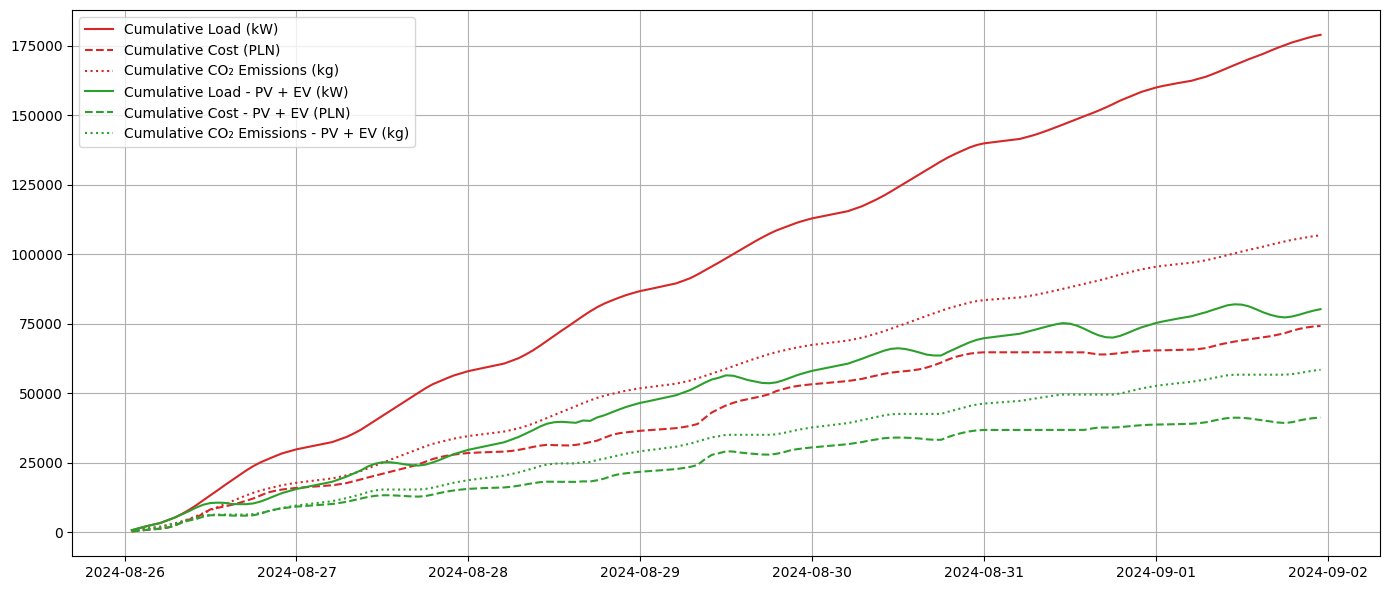

In [93]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))

# Plot cumulative cost
plt.plot(df['time'],df['sumaric_load'], label="Cumulative Load (kW)", color="tab:red")
plt.plot(df["time"], df["sumaric_cost_pln"], label="Cumulative Cost (PLN)", color="tab:red", linestyle='--')
plt.plot(df['time'],df['cumulativ_co2_kg'],color="tab:red", label="Cumulative CO₂ Emissions (kg)",  linestyle=':')

plt.plot(df["time"], df["sumaric_load_PV_EV"], label="Cumulative Load - PV + EV (kW)", color="tab:green")
plt.plot(df["time"], df["sumaric_cost_pln_PV_EV"], label="Cumulative Cost - PV + EV (PLN)", color="tab:green", linestyle='--')
plt.plot(df['time'],df['cumulativ_eco_co2_kg'], color="tab:green", label="Cumulative CO₂ Emissions - PV + EV (kg)", linestyle=':')



# Titles and labels
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

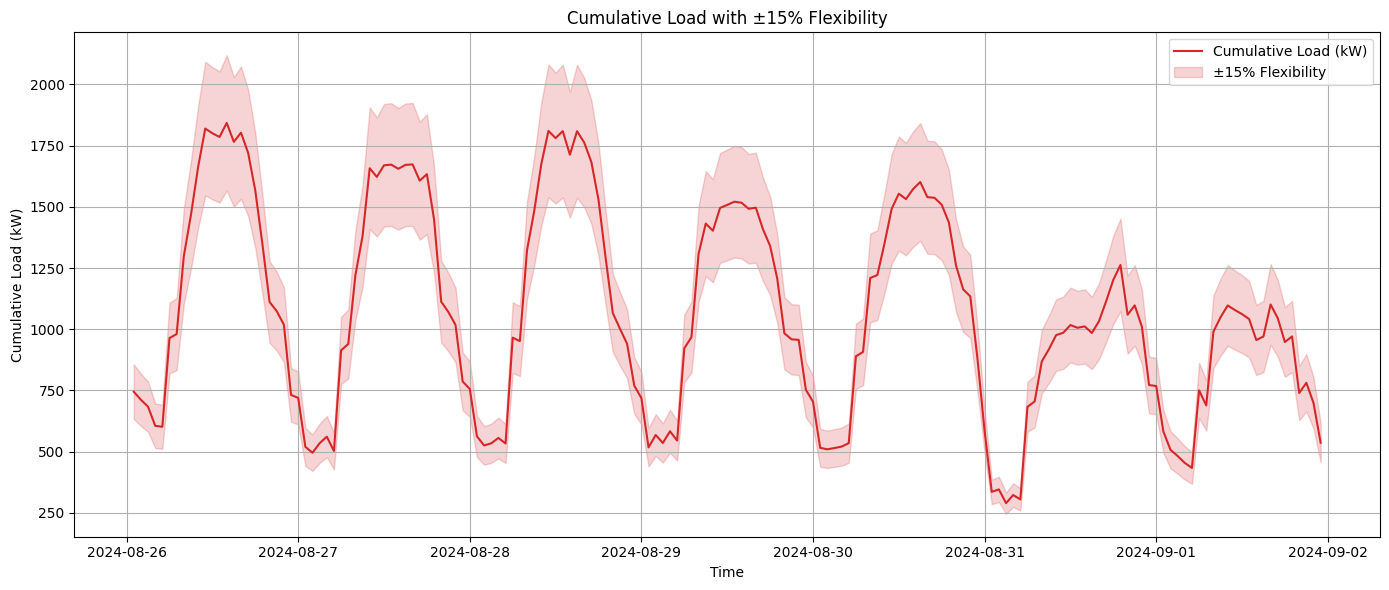

In [97]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))

# Central cumulative load
plt.plot(df['time'], df['load (kw)' ], color="tab:red", label="Cumulative Load (kW)")

# Add shaded area for ±15%
lower_bound = df['load (kw)'] * 0.85
upper_bound = df['load (kw)'] * 1.15
plt.fill_between(df['time'], lower_bound, upper_bound, color='tab:red', alpha=0.2, label="±15% Flexibility")

# Titles and labels
plt.title("Cumulative Load with ±15% Flexibility")
plt.xlabel("Time")
plt.ylabel("Cumulative Load (kW)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [99]:
# 1. *1.15
# 2. *0.85
# 3. *1.00

# Ensure 'time' is datetime
df["hour"] = df["time"].dt.hour

# Define multipliers based on hour
conditions = [
    (df["hour"] < 8),                      # 00:00–07:59
    (df["hour"] >= 8) & (df["hour"] < 16), # 08:00–15:59
    (df["hour"] >= 16)                     # 16:00–23:59
]

multipliers = [1.15, 0.85, 1.00]

# Apply multipliers to the load
df["new_load"] = df["load (kw)"] * pd.cut(df["hour"], bins=[-1, 7, 15, 23], labels=[1.15, 0.85, 1.00]).astype(float)

# Optional: drop 'hour' if not needed
df.drop(columns="hour", inplace=True)

display(df[["time", "load (kw)", "new_load"]])



,time,load (kw),new_load
0,2024-08-26 01:00:00+02:00,744.659033,856.357888
1,2024-08-26 02:00:00+02:00,711.664783,818.414500
2,2024-08-26 03:00:00+02:00,683.285406,785.778217
3,2024-08-26 04:00:00+02:00,605.304298,696.099942
4,2024-08-26 05:00:00+02:00,601.196288,691.375731
...,...,...,...
162,2024-09-01 19:00:00+02:00,970.434549,970.434549
163,2024-09-01 20:00:00+02:00,739.320280,739.320280
164,2024-09-01 21:00:00+02:00,780.998870,780.998870
165,2024-09-01 22:00:00+02:00,698.696249,698.696249


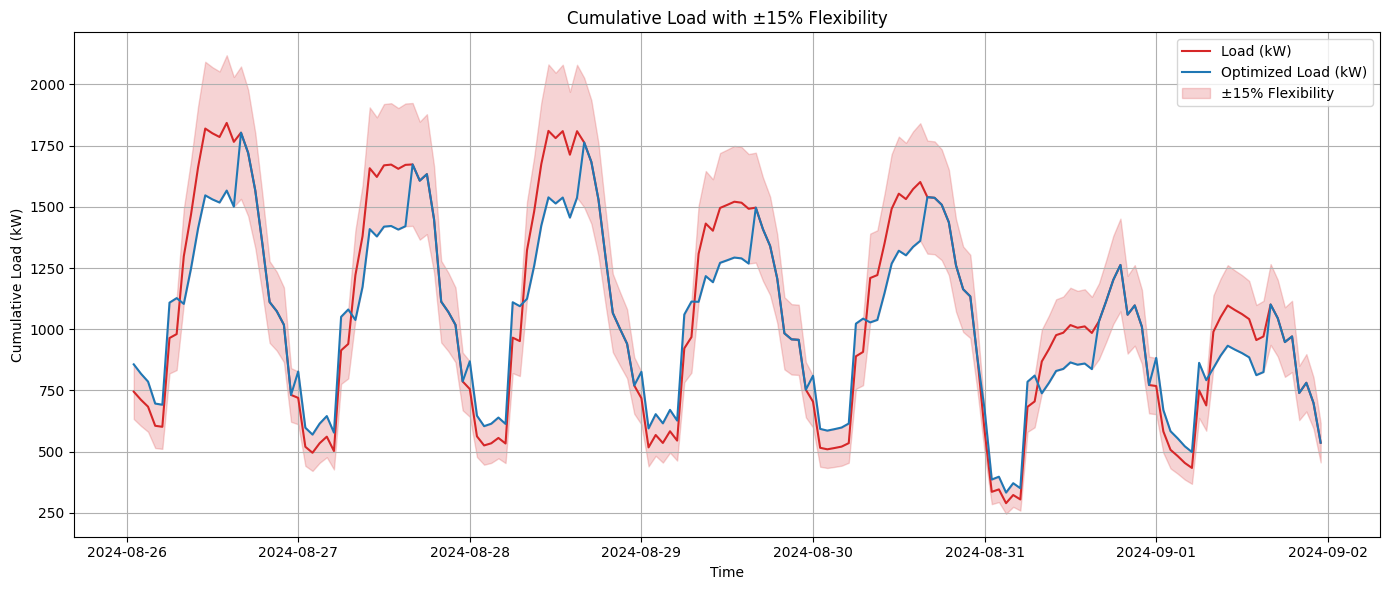

In [101]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))

# Central cumulative load
plt.plot(df['time'], df['load (kw)' ], color="tab:red", label="Load (kW)")
plt.plot(df['time'], df['new_load' ], color="tab:blue", label="Optimized Load (kW)")

# Add shaded area for ±15%
lower_bound = df['load (kw)'] * 0.85
upper_bound = df['load (kw)'] * 1.15
plt.fill_between(df['time'], lower_bound, upper_bound, color='tab:red', alpha=0.2, label="±15% Flexibility")

# Titles and labels
plt.title("Cumulative Load with ±15% Flexibility")
plt.xlabel("Time")
plt.ylabel("Cumulative Load (kW)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


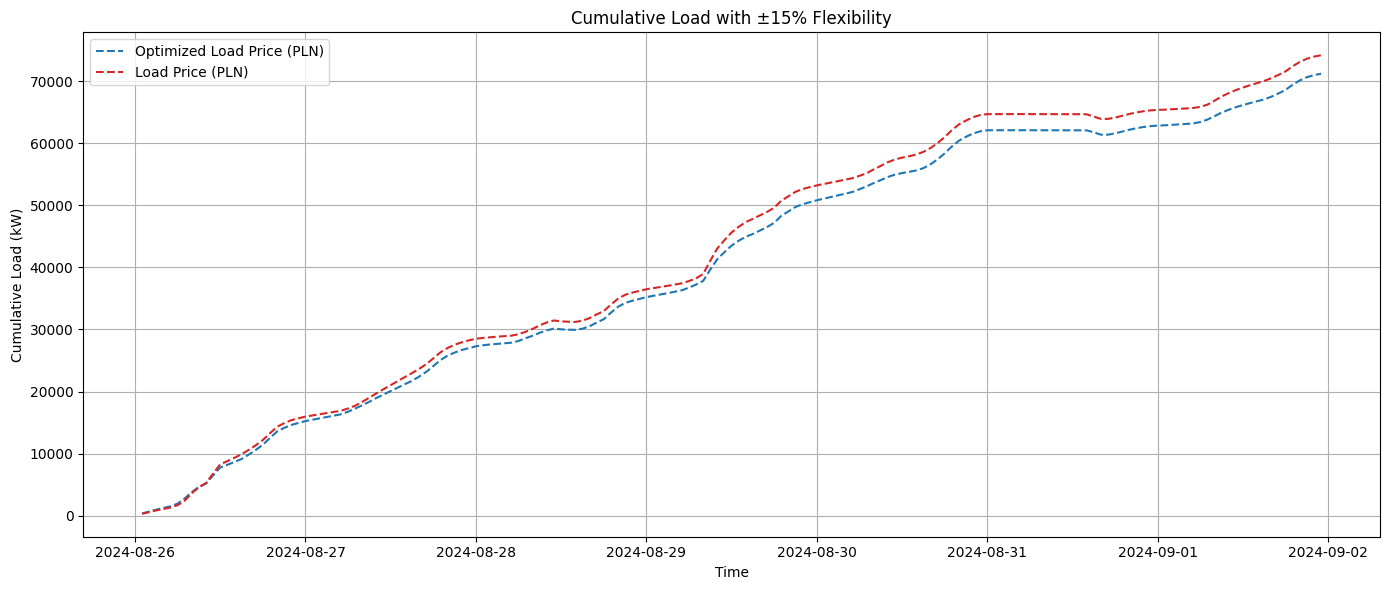

0.04015453593194225


In [118]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))

# Central cumulative load
df['cumulativ_opt_load']= df['new_load'].cumsum()
df['new_load_price'] = df['new_load'] * df['energy price (pln/mwh)'] / 1000
df['cumulativ_opt_load_price'] = df['new_load_price'].cumsum()

plt.plot(df['time'], df['cumulativ_opt_load_price' ], color="tab:blue", label="Optimized Load Price (PLN)", linestyle='--')
plt.plot(df['time'], df['sumaric_cost_pln' ], color="tab:red", label="Load Price (PLN)", linestyle='--')


# Titles and labels
plt.title("Cumulative Load with ±15% Flexibility")
plt.xlabel("Time")
plt.ylabel("Cumulative Load (kW)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

print((74184.30822568886 - 71205.47175545416)/74184.30822568886 )
